# Permutation test for correlation

In the previous examples, we used permutation testing to assess the statistical significance of a difference between groups (either a difference of means or a mean difference, depending on whether we were looking at paired or unpaired data...)

Permutation testing can also be used to assess the statistical significance of a <i>correlation</i>.

As a reminder, a correlation can occur *only* in paired designs, because a correlation implies that each individual’s score on one variable is *meaningfully paired* with their score on another variable. For example, a person’s height might be paired with their arm span, or their maths score might be paired with their English score.

Correlations can be interesting in themselves (do students who score highly on English tests also score highly on maths tests?; do people who eat more broccli have greater bone density?). 

Correlations can also arise because experimental measures depend on factors other than the variable we are trying to study, factors known as *confounding variables*. Check out this [website](https://www.tylervigen.com/spurious-correlations) for some strong yet meaningless correlations. 

Paired designs are often used to control for these confounds. For example, suppose we want to test whether men earn more than women. We might compare brothers and sisters, because their earnings are influenced by shared factors such as parental occupation, education, neighbourhood, and early-life opportunities.

However, in many cases the correlation itself is of direct interest. In such situations, the strength and direction of the correlation is the main question and permutation testing allows us to assess whether the observed correlation is larger than would be expected by chance.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Toy example

*[A toy example is an example with a very small dataset, just to show how it works]*

#### Question & design

Suppose we suspect that people who eat more broccoli have high IQs.  

This gives us **paired data**, because we have two measurements (broccoli consumption and IQ) for each individual. Each person contributes a pair of values, and it is the relationship between these paired values that we want to examine.

#### Hypotheses

We can state our hypotheses as follows:

$\mathcal{H_o}:$ There is no relationsip between broccoli consumption and IQ
* the correlation, Pearson's $r=0$

$\mathcal{H_a}:$ Those with higher broccoli consumption have higher IQ
* the correlation, Pearson's $r>0$

This is a one-tailed (directional) alternative hypothesis

#### Data

The following made-up data give weekly broccoli consumption in grams and IQ for 25 individuals:

In [2]:
broccoli = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/broccoli.csv')
broccoli

broccoli_g   IQ
0            0   87
1           28   91
2            0  101
3           20   92
4            0   96
5           92   95
6           88   92
7          128   94
8            0   96
9           22   99
10         114   99
11           0   96
12         146   99
13         255  108
14         131  100
15         255  107
16         390  114
17         402  107
18         216  108
19         719  104
20         395  107
21         485  114
22         553  116
23         682  116
24         815  111

Let's plot the data. Because each person provides a pair of measurements (their weekly broccoli consumption and their IQ) a *scatterplot* (or *regplot*) is the most informative choice here.

Each point on the plot represents one individual, with: their broccoli consumption on the x-axis, and their IQ on the y-axis.

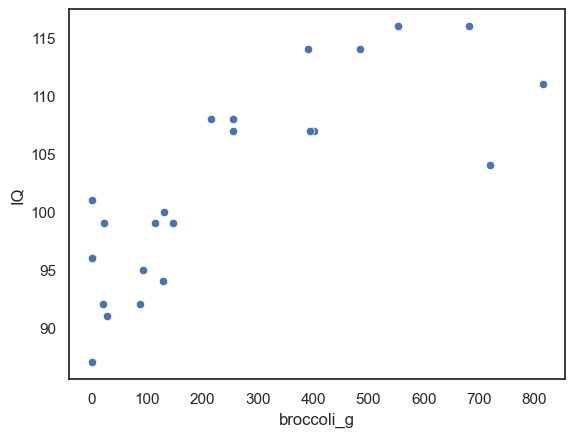

In [6]:
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ')
plt.show()

We can see that there does appear to be a correlation: individuals who eat more broccoli also tend, in general, to have higher IQ scores. The points show an upward trend, suggesting a positive relationship.

Of course, a visual impression is not enough to determine whether this correlation is statistically significant. We will take the same approach as with our other permutation tests. Let's start by finding our test statistic

### Test statistic

Here our test statistic is Pearson's $r$. Pearson’s $r$ measures the strength and direction of the linear relationship between two variables. A positive value indicates that higher broccoli consumption tends to be associated with higher IQ, and the magnitude (i.e., how close the value is to 1/-1) tells us how strong that relationship is.

In [7]:
broccoli.broccoli_g.corr(broccoli.IQ)

np.float64(0.8011532312132079)

The correlation is 0.80, which is actually very strong (remember they are made-up data!).

### Is this result statistically significant? 

We have observed a correlation of 0.80. Even if there were no real relationship between broccoli consumption and IQ, it is still possible that—in a small sample of 25 people—the individuals with the hdighest IQs just happen to be the ones who eat more broccoli. Purely by chance, random pairings can sometimes produce a strong positive correlation.

So we ask

***How often would a correlation as large as .8 occur just by chance if broccoli consumption and IQ were paired randomly?***

### Permutation

To work out how unusual our observed correlation in broccoli consumption and IQ is, we carry out a permutation test. Again, the idea is to shuffle the data points and see what kinds of correlations would occur just by chance (i.e. the null distribution).

For each resample:

1. **Randomly reassign the pairings:** Shuffle the data around to create a new sample in which, we we randomly decide which IQ is assigned to which broccoli consumption value.
2. **Calculate the correlation:** <tt>Pearson's $r$</tt>.
3. **Repeat steps 1 & 2 thousands of times** this will create a distribution in which the correlation between broccoli consumption and IQ truly is zero. Now we can ask on what proportion of random resamples we get correlations at least as large as our observed correlation of 0.8.

Our sample tells us some interesting things about the individual variables—information that is true regardless of whether IQ and broccoli are actually related.

**Independent features of Broccoli distribution (to be retained):**

* Most people eat between 0 and 500g of broccoli a week
* Quite a few people eat 0g of broccoli (they never eat broccoli, basically)

It also tells us about some potential effects to do with the relationship between IQ and broccoli:

**Possible correlation effects (to be shuffled out)**
* the quantity of broccoli eaten seems to be higher for individuals with higher IQ
* none of the highest IQ people are the 0g of broccoli people


### Visualising random shuffles in correlation:

Below you see jointplots for the original data and three random permutations (joint plots are scatter plots with histograms of the distributions of x and y at the sides, created using the function `sns.jointplot()`)


Notice that in the shuffled data, when each person's broccoli consupmtion is randomly paired with another person's IQ, the correlation goes away. However, the distribution of each variable by itself (the histograms in the margins) remain unchanged.

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk5_3PermutationsCorr.png" width="99%" />

You can see that the relationship between broccoli consumption and IQ looks less tight in the shuffled datasets.

Below is some code that will randomly shuffle our `IQ` column, but keep the `broccoli_g` column in tact. This will preserve the important aspects of the original dataset, while creating a random pairing between any individual's IQ and their broccoli consumption

-0.05086703420756765


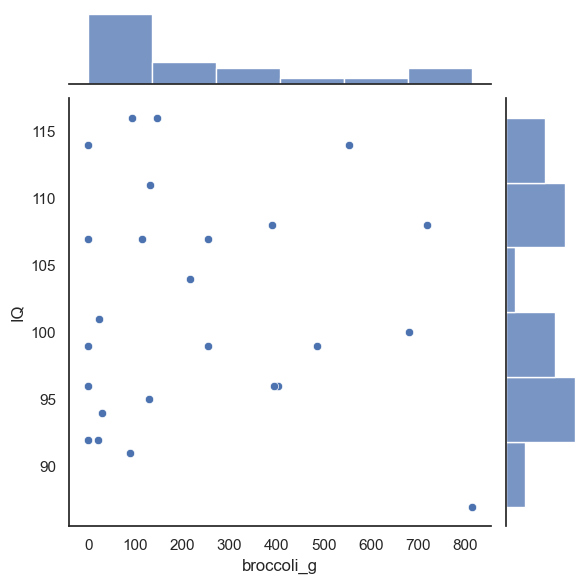

In [29]:
perm = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/broccoli.csv')

#Randomise the order of the IQ column
perm.IQ = perm.IQ.sample(len(perm), replace = False).to_list()

sns.jointplot(data = perm, x = 'broccoli_g', y = 'IQ')

# Compute the test statistic for THIS permutation
test_stat = perm.broccoli_g.corr(perm.IQ)
print(test_stat)

## Run Many shuffles

To get an estimate of how likely it is to get a test statistic of 0.8 due to chance, we need to run a *lot* of shuffles. Here we can loop through our desired number of permutations, repeating this shuffling process each time and recalculaing the test statistic. 

<Axes: ylabel='Count'>

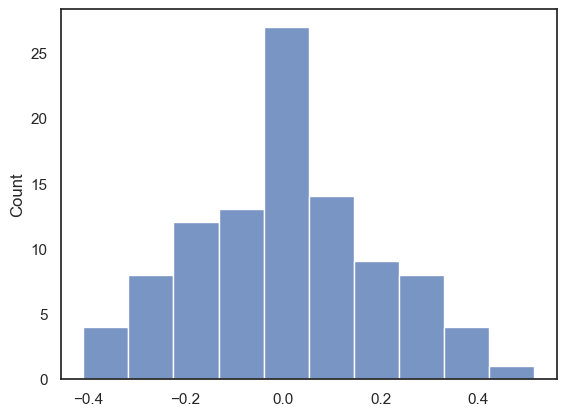

In [30]:
nReps = 100
perm_tests = np.empty(nReps)

for i in range(nReps):
    # Make a copy so we do not overwrite the original data
    perm = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/broccoli.csv')

    #Randomise the order of the IQ column
    perm.IQ = perm.IQ.sample(len(perm), replace = False).to_list()

    perm_tests[i] = perm.broccoli_g.corr(perm.IQ)

sns.histplot(data=perm_tests, bins = 10)

With 100 permutations you can already see the null distribution taking shape. Maybe you can also notice, that the "random" correlations tend to be much lower than what we found in our original data set. Importantly, most of the permutations center around a correlation of 0, indicating now relationship between the variables. However how often do we see a person r at least as large as we observed in data set (i.e., 0.8)? To increase our confidence we probably want to run even more permutations!

## Run 10,000 shuffles

To get a fine-grained estimate of how likely it is to get a test statistic of r=0.8 due to chance, we run a *lot* of shuffles - say 10,000.

We can do this using a function from the library `scipy.stats`, called `scipy.stats.permutation_test()`

This will have a few advantages. First, the inbuilt function is much faster and therefore we can easily increase the number of permutattions without costing too much time. The function also provides some additional output which we will take a closer look at below. Start by running the code block below - don't worry too much about the syntax we'll dive into that later...


In [31]:
def correlate(x, y):
    tmp = np.corrcoef(x,y)
    c = tmp[0][1] 
    return c

results = stats.permutation_test((broccoli.broccoli_g, broccoli.IQ), correlate, 
                                  permutation_type='pairings', alternative='greater', n_resamples=10000)
print(results)

PermutationTestResult(statistic=np.float64(0.8011532312132079), pvalue=np.float64(9.999000099990002e-05), null_distribution=array([ 0.22867383,  0.23544152,  0.06548209, ..., -0.12511485,
       -0.15405458,  0.02505303], shape=(10000,)))



The results are displayed below the code box; there are number of outputs from the test (contained in the parentheses)

* **statistic** - the test statistic (correlation) from our actual data, ie r=0.8
* **pValue** - the proportion of shuffles in which a result greater than 0.8 was obtained (due to chance) - note this is very small, $9.9 \times 10^{-5}$ or about 1/10000 
* **null distribution** - this contains all 10,000 correlation values, for the 10,000 shuffles

### The Null Distribution

The **null distribution** is the set of 10,000 values we get for the correlation, from our 10,000 shuffles (the equivalent of the red numbers on the 4-permutation example above)

Let's plot the null distribution in a histogram we will mark the test statistic from our actual data with a red dotted line:

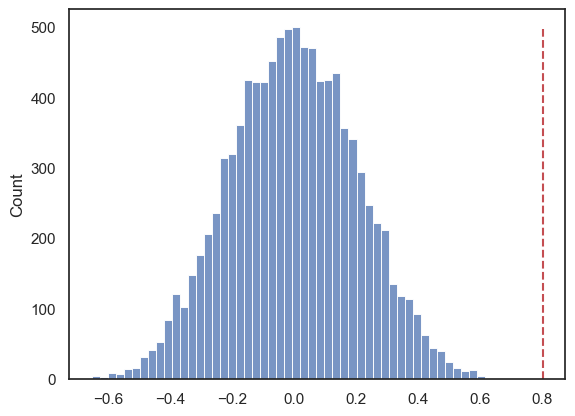

In [33]:
sns.histplot(results.null_distribution)
plt.plot([results.statistic,results.statistic],[0,500], 'r--')
plt.show()

We can see that the null distribution is nice and symmetrical (the average correlation in shuffled data is zero, whilst positive and negative correlations are equally likely)

Note that our observed correlation, 0.8, is so rare that it was *never* obtained in the 10,000 shuffles!!

In [34]:
# check which values is the null distribution are greater than 4.6 and code as 1/0
# then use the numpy function np.mean() to get the avergae of those ones and zeros (ie he proportion of 1s)
np.mean(results.null_distribution >= 0.801)

np.float64(0.0)

### The $𝑝$-value¶

The probability that the test statistic (in this case, the correlation between broccoli consumption and IQ) would be observed if the null hypothesis were true, is sometimes called the $𝑝$-value.

Our permutation test shows that the $𝑝$-value associated with the observed difference of means is basically zero- we never get a correlation of 0.80 in our 10,000 random shuffles.

The result is considered statistically significant if $𝑝$ is smaller than some predetermined level, known as $\alpha$. Usually $\alpha=0.05$ or $\alpha=0.01$ is used, so the result is significant if $p=0.05$ or $p=0.01$. Our result would be considered highly statistically significant.

## Syntax of `stats.permutation_test()`

Let's have a look at the Python code to run the permutation test.


Firstly, we had to give the function `stats.permutation_test()` our two samples. In this case, the data are in 'wide form', ie the two measurements for each individual (broccoli consumption and IW) are contained in two different columns <tt>(broccoli.broccoli_g, broccoli.IQ)</tt>

Secondly, to tell `stats.permutation_test()` the test statistic we want to get the null distribution of, we had to pass it a *function* that calculates that test statistic. We created that function, `correlation()`, using a function definition, before running the permutation test

### Arguments

When running the permutation test, we have to specify some arguments

* **n_resamples** the number of shuffles to do.
* **alternative** - whether to do a one-tailed test (and in whcih direction: 'greater' counts how many shuffles result in test statistic values greater than the one obtained from unshuffled data) or a two tailed test
* **permutation_type** - pairings, samples, or independent. These are for test of correlation, paired data and unpaired data respectively.

Here we are testing for correlation so we shuffle the *pairings*, ie in shuffled data we pair each person's IQ with a random person's broccoli consumption

## Recap

To run a permutation test on a correlation, we shuffled up all the pairings so each person's IQ was paired with someone else's broccoli consumption. We did not switch any datapoints from the broccoli column into the the IQ column (!).

For each shuffle we calculated the correlation between broccoli consumption and IQ

Permutation testing in this way gives us a null distribution for the correlation. Values of the correlation coefficient that occur rarely in the null distriubtion are considered statistically significant.
    
To run the permutation test with <tt>scipy.stats</tt> we need the option `permutation_type='pairings'`